# 7.1 Example: Random Walks

In [9]:
import random
import numpy as np
import matplotlib.pyplot as plt

An illustrative application of utilizing array operations is in the simulation of random walks. Let’s first consider a simple random walk starting at 0 with steps of 1 and –1 occurring with equal probability.

## 7.1.1 Pure Python Implementation

Here is a pure Python way to implement a single random walk with 1,000 steps using the built-in `random` module.

In [10]:
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) == 0 else -1
    position += step
    walk.append(position)

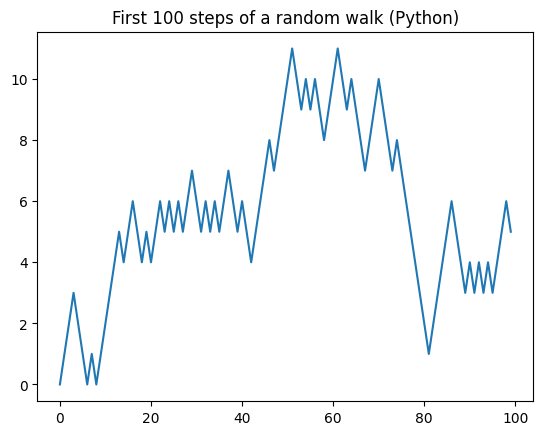

In [11]:
plt.plot(walk[:100])
plt.title("First 100 steps of a random walk (Python)")
plt.show()

## 7.1.2 NumPy Implementation

You might have noticed that `walk` is simply the cumulative sum of the random steps. We can use NumPy to make this much more efficient.

In [12]:
nsteps = 1000
rng = np.random.default_rng(seed=12345)
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

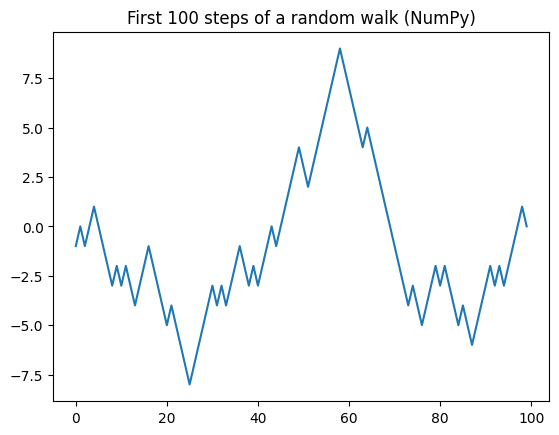

In [13]:
plt.plot(walk[:100])
plt.title("First 100 steps of a random walk (NumPy)")
plt.show()

## 7.1.3 Analyzing the Walk

From this, we can start to extract statistics like the minimum and maximum value along the walk's trajectory.

In [14]:
print(f"Minimum value: {walk.min()}")
print(f"Maximum value: {walk.max()}")

Minimum value: -8
Maximum value: 50


A more complicated statistic is the *first passage time*, the step at which the random walk reaches a particular value. Here we might want to know how long it took the random walk to get at least 10 steps away from the origin 0 in either direction. `np.abs(walk) >= 10` gives us a boolean array indicating where the walk has reached or exceeded 10, but we want the index of the *first* 10 or –10. This can be computed using `argmax`, which returns the first index of the maximum value in the boolean array (`True` is the maximum value).

In [15]:
first_passage_time = (np.abs(walk) >= 10).argmax()
print(f"First passage time (10 steps away): {first_passage_time}")


First passage time (10 steps away): 155
